In [1]:
from PIL import Image, ImageOps
import numpy as np
import os
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Function to preprocess images and generate labels
def preprocess_images_with_labels(image_paths, target_size=(128, 128), normalize=True, augment=False):
    processed_images = []
    labels = []

    for img_path in image_paths:
        try:
            # Extract label from the directory structure (parent folder name)
            label = os.path.basename(os.path.dirname(img_path))

            # Open the image
            img = Image.open(img_path).convert('RGB')

            # Resize the image
            img = img.resize(target_size)

            # Augmentation (Optional)
            if augment:
                if random.random() > 0.5:
                    img = ImageOps.mirror(img)  # Horizontal flip
                if random.random() > 0.5:
                    angle = random.choice([0, 90, 180, 270])
                    img = img.rotate(angle)

            # Convert to numpy array
            img_array = np.asarray(img)

            # Normalize the image
            if normalize:
                img_array = img_array / 255.0

            # Append the processed image and its label to the lists
            processed_images.append(img_array)
            labels.append(label)

        except Exception as e:
            print(f"Error processing {img_path}: {e}")

    return np.array(processed_images), np.array(labels)

# Function to collect image paths and print picture counts in each directory
def images_with_labels(path):
    found_images = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.jpg'):
                found_images.append(os.path.join(root, file))
    return found_images

# Paths to the dataset directories 
# train_path = r"C:\Users\asmun\OneDrive - NTNU\H24\Datadrevet\it3212-data-driven-software\datasets\intel\seg_train"
# test_path = r"C:\Users\asmun\OneDrive - NTNU\H24\Datadrevet\it3212-data-driven-software\datasets\intel\seg_test"

train_path = "../datasets/intel-image-classification/seg_train"
test_path = "../datasets/intel-image-classification/seg_test"

# Get the list of train and test images
train_image_paths = images_with_labels(train_path)
test_image_paths = images_with_labels(test_path)

# Split the test images into validation and test sets (50% validation, 50% test)
val_image_paths, test_image_paths = train_test_split(
    test_image_paths, test_size=0.5, random_state=42, stratify=[os.path.basename(os.path.dirname(p)) for p in test_image_paths]
)

# Preprocess the train images and generate labels
train_data, train_labels = preprocess_images_with_labels(train_image_paths, target_size=(128, 128), normalize=True, augment=True)

# Preprocess the validation images (no augmentation)
val_data, val_labels = preprocess_images_with_labels(val_image_paths, target_size=(128, 128), normalize=True, augment=False)

# Preprocess the test images (no augmentation)
test_data, test_labels = preprocess_images_with_labels(test_image_paths, target_size=(128, 128), normalize=True, augment=False)

# Encode labels to integers
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.transform(val_labels)
test_labels_encoded = label_encoder.transform(test_labels)

print(f"Preprocessed {len(train_data)} train images.")
print(f"Preprocessed {len(val_data)} validation images.")
print(f"Preprocessed {len(test_data)} test images.")

Preprocessed 9248 train images.
Preprocessed 973 validation images.
Preprocessed 973 test images.


In [2]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode labels into integers
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.transform(val_labels)
test_labels_encoded = label_encoder.transform(test_labels)


# If one-hot encoding is required:
train_labels_one_hot = to_categorical(train_labels_encoded)
val_labels_one_hot = to_categorical(val_labels_encoded)
test_labels_one_hot = to_categorical(test_labels_encoded)


# Print the shapes of processed data and one-hot labels
print(f"Shape of processed data: {train_data.shape}")  # (N, 128, 128, 3)


Shape of processed data: (9248, 128, 128, 3)


Need to augmentate pictures to expand dataset by rotating and doing things with the images

In [3]:
# import os
# import random
# from PIL import Image, ImageOps, ImageEnhance
# import numpy as np
# from collections import Counter

# def load_images_and_labels(data_dir):
#     images = []
#     labels = []
    
#     for class_label in os.listdir(data_dir):  # Each folder is a class
#         class_dir = os.path.join(data_dir, class_label)
#         if os.path.isdir(class_dir):
#             for image_name in os.listdir(class_dir):
#                 image_path = os.path.join(class_dir, image_name)
#                 if image_path.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for valid image files
#                     images.append(image_path)
#                     labels.append(class_label)  # Use folder name as the label

#     return images, labels

# def resize_and_balance(images, labels, size=128):
#     processed_images = []
#     processed_labels = []
    
#     # Count the number of images per class
#     label_counts = Counter(labels)
#     max_count = max(label_counts.values())  # Find the maximum class count

#     # Group images by class
#     class_images = {label: [] for label in label_counts}
#     for image, label in zip(images, labels):
#         class_images[label].append(image)

#     # Resize existing images and augment minority classes
#     for label, image_paths in class_images.items():
#         current_count = label_counts[label]
#         num_to_add = max_count - current_count
        
#         # Add resized images for existing samples
#         for image_path in image_paths:
#             img = process_image(image_path, size, augment=False)
#             processed_images.append(img)
#             processed_labels.append(label)

#         # Augment additional images for balancing
#         if num_to_add > 0:
#             for _ in range(num_to_add):
#                 img_path = random.choice(image_paths)
#                 img = process_image(img_path, size, augment=True)  # Augment for new samples
#                 processed_images.append(img)
#                 processed_labels.append(label)

#     return np.array(processed_images), np.array(processed_labels)

# def process_image(image_path, size, augment=False):
#     img = Image.open(image_path).convert('RGB')  # Convert to RGB
#     img = img.resize((size, size))  # Resize to specified size

#     if augment:
#         if random.random() > 0.5:  # Random rotation
#             angle = random.randint(-20, 20)  # Smaller rotation range
#             img = img.rotate(angle)

#         if random.random() > 0.5:  # Horizontal flip
#             img = ImageOps.mirror(img)

#         if random.random() > 0.5:  # Brightness adjustment
#             enhancer = ImageEnhance.Brightness(img)
#             factor = random.uniform(0.9, 1.1)  # Slight brightness adjustment
#             img = enhancer.enhance(factor)

#     img = np.array(img) / 255.0  # Normalize to [0, 1]
#     return img


# # Usage Example
# found_im, labels = load_images_and_labels(pat)
# processed_images, processed_labels = resize_and_balance(found_im, labels, size=128)
# print(f"Processed images shape: {processed_images.shape}")
# print(f"Balanced label distribution: {Counter(processed_labels)}")


In [4]:
# from sklearn.model_selection import train_test_split
# from collections import Counter

# # Assuming resize_augment_and_balance has already been run
# processed_images, processed_labels = resize_augment_and_balance(found_im, labels, size=128, augment=True)

# # Check the updated label distribution
# print(Counter(processed_labels))  # Ensure labels are balanced

# # Split the dataset into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(
#     processed_images, processed_labels, test_size=0.3, random_state=42
# )
# X_val, X_test, y_val, y_test = train_test_split(
#     X_temp, y_temp, test_size=0.5, random_state=42
# )

# print(f"Training size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")


In [5]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

# Ensure train_data is a numpy array of shape (N, 128, 128, 3)
train_data = np.array(train_data)

# Check the shape of train_data
if train_data.shape[-1] != 3 or train_data.shape[1:3] != (128, 128):
    raise ValueError("Train data must have shape (N, 128, 128, 3).")

# Preprocess the images for ResNet50
train_data_preprocessed = preprocess_input(train_data)
val_data_preprocessed = preprocess_input(val_data)
test_data_preprocessed = preprocess_input(test_data)

# Load a pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Create a feature extractor model
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

# Extract features from preprocessed images
features_train = feature_extractor.predict(train_data_preprocessed, batch_size=32, verbose=1)
features_val = feature_extractor.predict(val_data_preprocessed, batch_size=32, verbose=1)
features_test = feature_extractor.predict(test_data_preprocessed, batch_size=32, verbose=1)

print(f"Extracted train features shape: {features_train.shape}")  # Example: (N, 4, 4, 2048)


289/289 ━━━━━━━━━━━━━━━━━━━━ 92s 307ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 14s 449ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 328ms/step
Extracted train features shape: (9248, 4, 4, 2048)


In [6]:
# Flatten the extracted features
features_train_flat = features_train.reshape(features_train.shape[0], -1)
features_val_flat = features_val.reshape(features_val.shape[0], -1)
features_test_flat = features_test.reshape(features_test.shape[0], -1)

print(f"Flattened train features shape: {features_train_flat.shape}")  # Example: (N, 32768)


Flattened train features shape: (9248, 32768)


Number of components chosen to retain 80% variance: 34
Reduced train features shape: (9248, 34)
Reduced validation features shape: (973, 34)
Reduced test features shape: (973, 34)


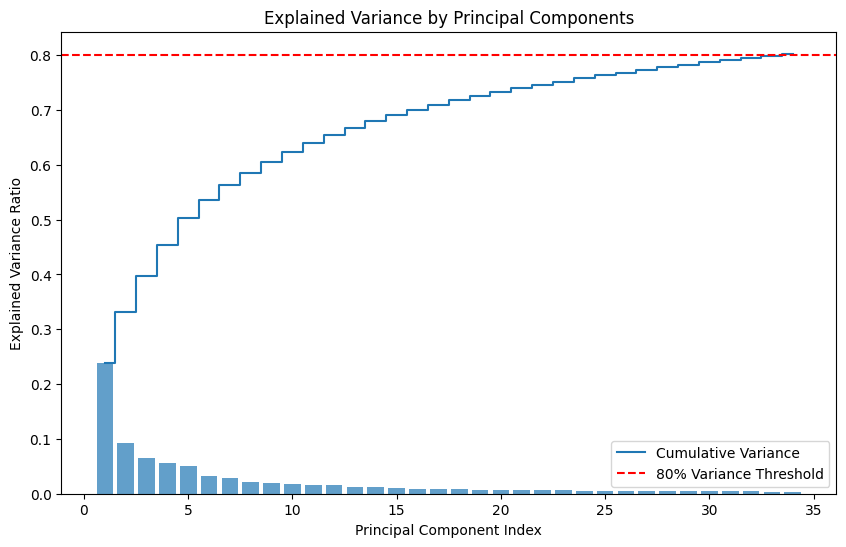

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA with 80% variance threshold on the training data
pca = PCA(n_components=0.8)  # Retain 80% of the variance
features_train_pca = pca.fit_transform(features_train_flat)


# Check the number of components selected
n_components = pca.n_components_
print(f"Number of components chosen to retain 80% variance: {n_components}")
print(f"Reduced train features shape: {features_train_pca.shape}")  # (N, n_components)


features_val_pca = pca.transform(features_val_flat)  # Transform validation data
features_test_pca = pca.transform(features_test_flat)  # Transform test data

# Print shapes for validation and test PCA-transformed features
print(f"Reduced validation features shape: {features_val_pca.shape}")  # (N_val, n_components)
print(f"Reduced test features shape: {features_test_pca.shape}")  # (N_test, n_components)

# Plot explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative Variance')
plt.axhline(0.8, color='r', linestyle='--', label='80% Variance Threshold')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.show()


In [8]:
# import matplotlib.pyplot as plt
# # Fit PCA and calculate explained variance
# pca = PCA(n_components=100)  # Limit to 10 components for visualization
# pca.fit(features_train_flat)
# explained_variance = pca.explained_variance_ratio_

# # Plot the explained variance
# plt.figure(figsize=(10, 6))
# plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
# plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative Variance')
# plt.xlabel('Principal Component Index')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Explained Variance by Principal Components')
# plt.legend(loc='best')
# plt.show()
